<a href="https://colab.research.google.com/github/jeanmichael1993/Atividade_1_Regressao/blob/master/Atividade_1_Regress%C3%A3o(Cancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wisconsin Diagnostic Breast Cancer

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

#Analise de Dados

##Leitura dos arquivos

In [ ]:
with open('wdbc.names', 'r') as f:
  file_content = f.read()
print(file_content)


1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

In [ ]:
import pandas as pd
import numpy as np

pd_csv = pd.read_table('wdbc.data', sep=',', header=None)
pd_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Adiconando nomes para colunas

In [ ]:
pd_new = pd_csv.rename(columns = {0 : 'ID',1:'Diagnosis',2:'radius1',3:'texture1',4:'perimeter1',5:'area1',6:'smoothness1',7:'compactness1',
                                  8:'concavity1',9:'concave_points1',10:'symmetry1',11:'fractal_dimension1',
                                  12:'radius2',13:'texture2',14:'perimeter2',15:'area2',16:'smoothness2',
                                  17:'compactness2',18:'concavity2',19:'concave_points2',20:'symmetry2',
                                  21:'fractal_dimension2',22:'radius3',23:'texture3',24:'perimeter3',
                                  25:'area3',26:'smoothness3',27:'compactness3',28:'concavity3',
                                  29:'concave_points3',30:'symmetry3',31:'fractal_dimension3'})

##Analise descritiva

In [ ]:
pd_new.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
pd_new.shape

(569, 32)

In [ ]:
pd_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [ ]:
pd_new.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
pd_new.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
pd_new.isna().sum() / pd_new.shape[0] * 100


ID                    0.0
Diagnosis             0.0
radius1               0.0
texture1              0.0
perimeter1            0.0
area1                 0.0
smoothness1           0.0
compactness1          0.0
concavity1            0.0
concave_points1       0.0
symmetry1             0.0
fractal_dimension1    0.0
radius2               0.0
texture2              0.0
perimeter2            0.0
area2                 0.0
smoothness2           0.0
compactness2          0.0
concavity2            0.0
concave_points2       0.0
symmetry2             0.0
fractal_dimension2    0.0
radius3               0.0
texture3              0.0
perimeter3            0.0
area3                 0.0
smoothness3           0.0
compactness3          0.0
concavity3            0.0
concave_points3       0.0
symmetry3             0.0
fractal_dimension3    0.0
dtype: float64

In [ ]:
pd_new['Diagnosis'].value_counts() * 100 / pd_new.shape[0]

Diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64

In [ ]:
import altair as alt

test = (alt.Chart(pd_new)
.mark_bar()
.encode(x = 'Diagnosis:N',
        y = 'count():Q',
        color = 'Diagnosis')
.interactive()
.properties(title = 'Diagnosis', width=200)
)

test.encode(x='Diagnosis:N') | test.encode(x='smoothness1',color='smoothness1').properties(title = 'smoothness1')

alt.HConcatChart(...)

In [ ]:
pd_new.columns[2:]

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [ ]:
import altair as alt

colunas = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2']

alt.Chart(pd_new).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color = 'Diagnosis'
).properties(
    width=200,
    height=200
).repeat(
    row=colunas,
    column=colunas[::-1]
).interactive()

alt.RepeatChart(...)

In [ ]:
corr = pd_new.iloc[0:,2:].corr()

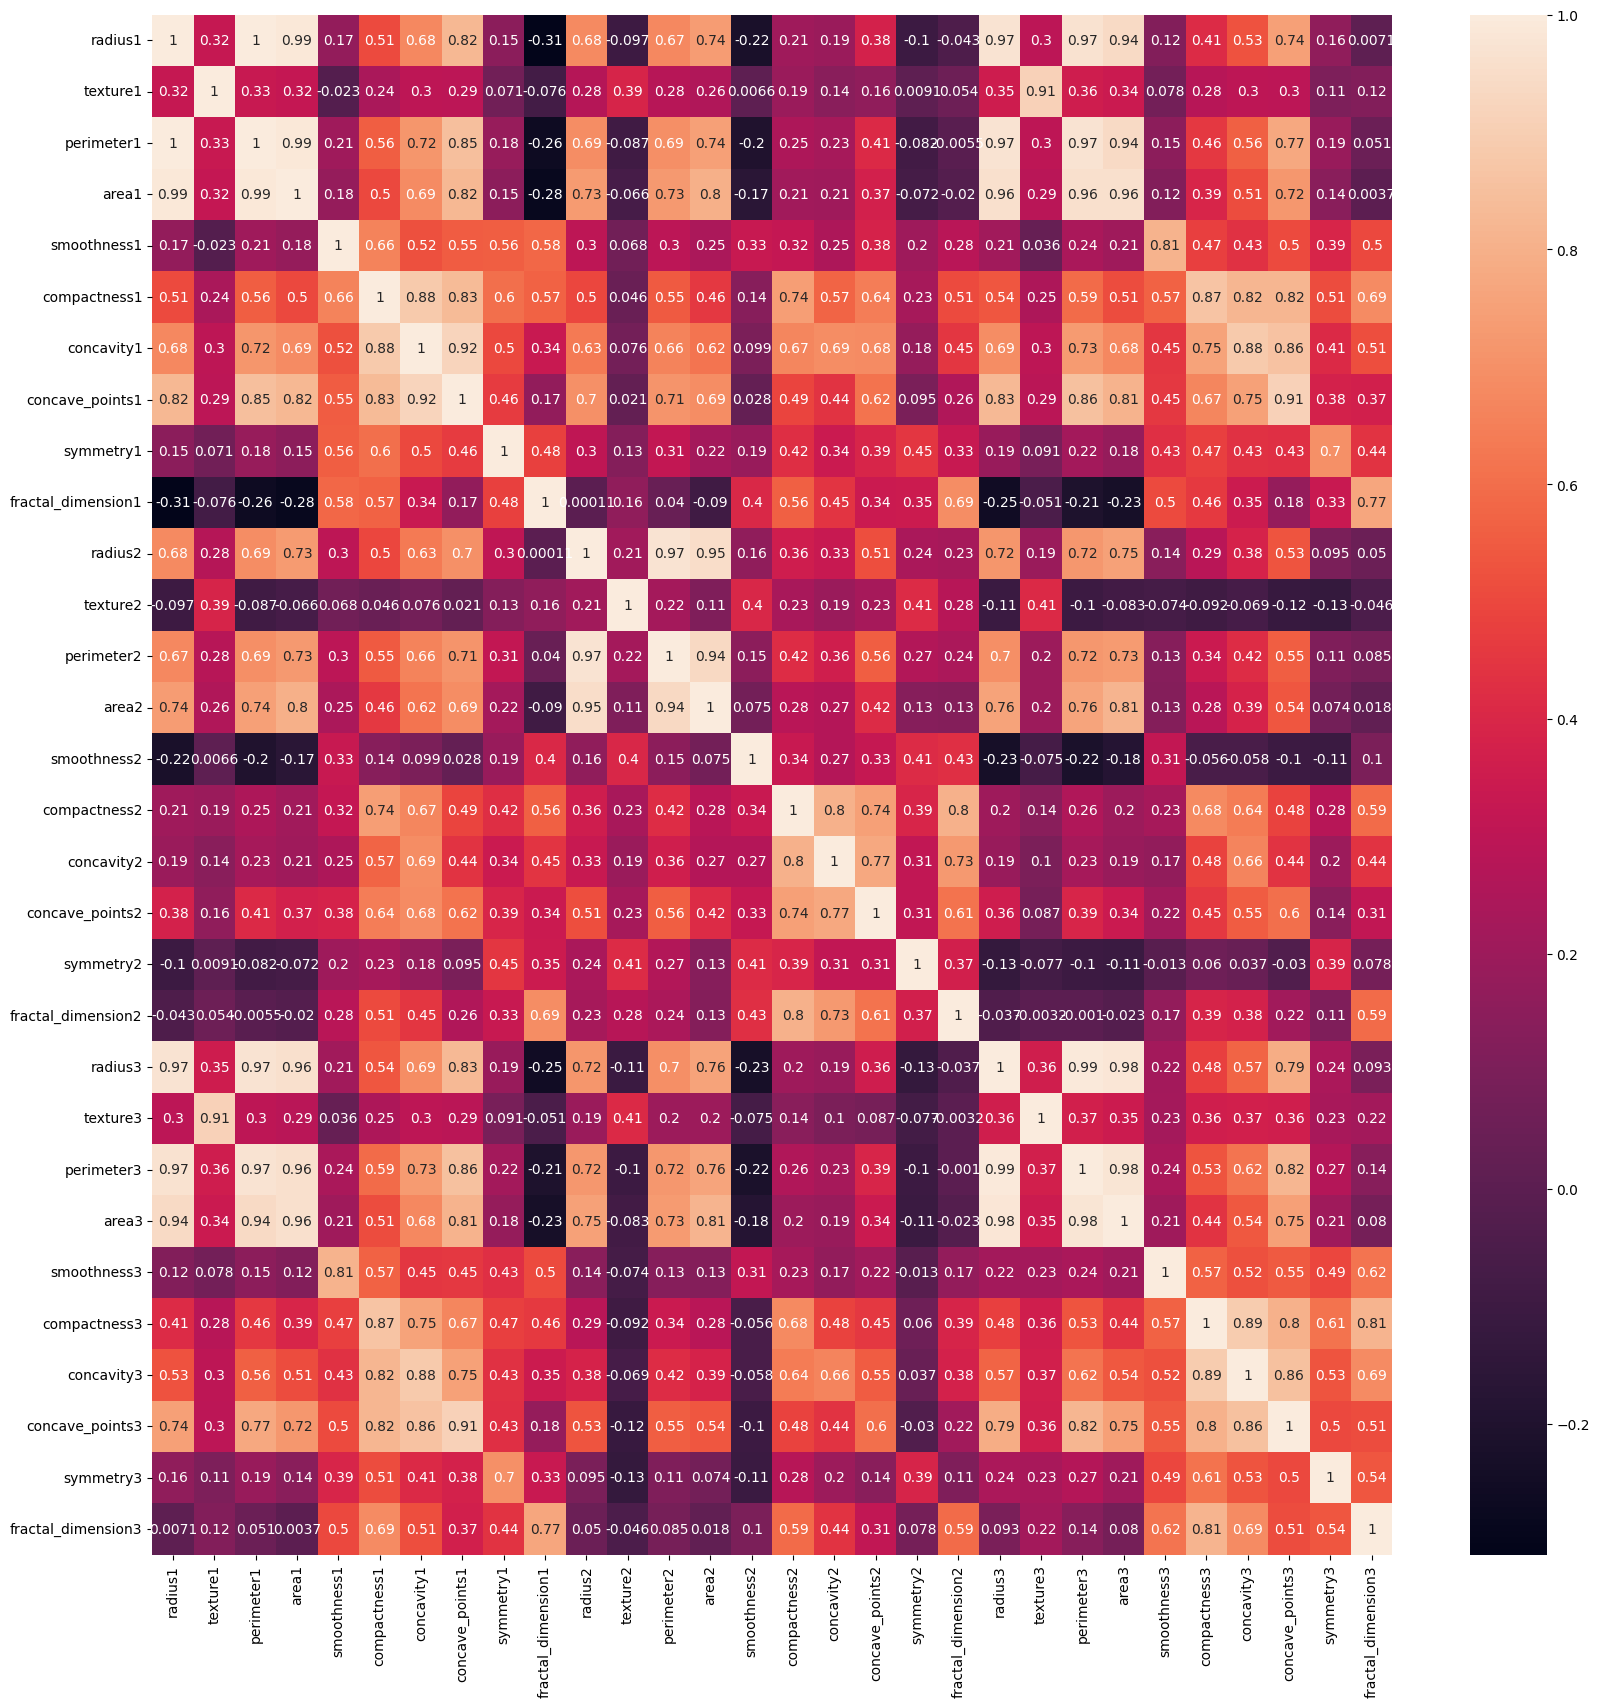

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

#Preparando dados para o modelo

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Calcular a Matriz de Correlação
correlacao = corr

# 2. Identificar e Eliminar Atributos Dependentes
limite = 0.80  # Valor medio para um limite de correlação
#obtem se cada coluna é True ou False para cada atributo, se for maior que ou igual o limite ele será true, por final será feito uma soma de
# quantos True tem por linha, aquele que tiver mais quantidade de dependencia será removido.
dependencia = (correlacao.abs() > limite).sum()
columns_to_drop = dependencia[dependencia > 2].index  # Colunas com correlação forte

correlacao = correlacao.drop(columns=columns_to_drop)

# 3. Selecionar Atributos com Correlação Média Menor
threshold_medium_corr = 0.36 # Limite de correlação média menor
medium_corr_pairs = (correlacao.abs() <= threshold_medium_corr).sum()
columns_selected = medium_corr_pairs[medium_corr_pairs > 1].index  # Atributos com correlação média menor

df_final = correlacao[columns_selected]
# 4. Normalizar os Atributos Independentes
scaler = MinMaxScaler()
df_final_normalized = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)



In [ ]:
df_final_normalized.shape

(30, 14)

In [ ]:
pd_new2 = pd_new.drop(columns=columns_to_drop)
X = pd_new2.iloc[:,2:]
y = pd_new2.iloc[:,1]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Previsoes para testar nossa modelo preditivo
Previsoes = regressor.predict(X_test_scaled)

In [ ]:
Previsoes[0:5]

array([ 0.38523633,  0.5505143 ,  0.74252325,  0.08086469, -0.00491713])

In [ ]:
y_test[0:5]

array([0, 1, 1, 0, 0])

In [ ]:
# Avaliar todas as métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

R2 = regressor.score( X_test_scaled, y_test )
MAE = mean_absolute_error( y_test, Previsoes )
MSE = mean_squared_error( y_test, Previsoes )
RMSE = mean_squared_error( y_test, Previsoes, squared=False )
MAPE = mean_absolute_percentage_error(y_test, Previsoes) * 100

Dicionario = {
    'R²' : round( R2, 2 ),
    'MAE' : round(MAE, 2),
    'MSE' : round(MSE, 2),
    'RMSE' : round(RMSE, 2),
    'MAPE' : round(MAPE, 2)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
R²,5.900000e-01
MAE,2.500000e-01
MSE,1.000000e-01
RMSE,3.100000e-01
MAPE,6.841361e+16


#Regressão Logistica

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model.intercept_

array([-3.92732287])

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_prob = model.predict_proba(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.9122807017543859


In [ ]:
confusion_matrix(y_test, y_pred)

array([[103,   5],
       [ 10,  53]])

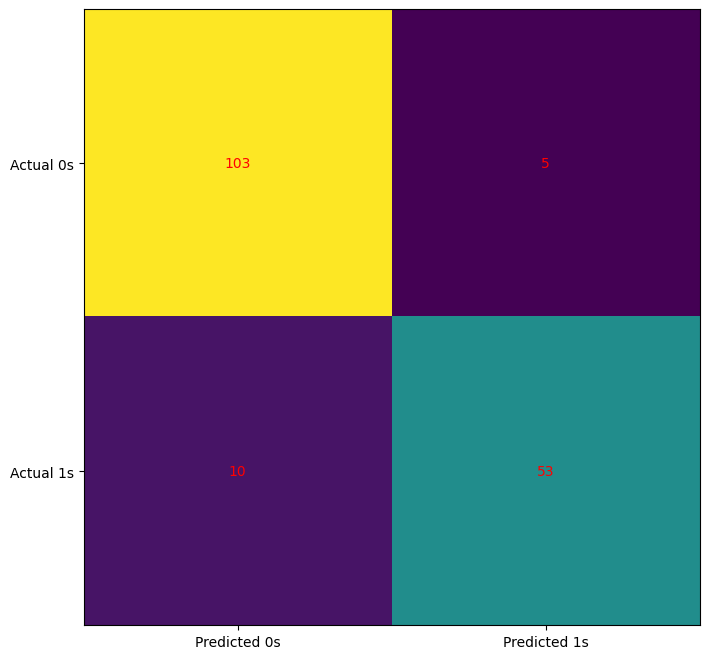

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       108
           1       0.91      0.84      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



#Conclusão

Com base na análise efetuada, foi identificado que o melhor modelo é a Regressão Logística, principalmente pelo fato de que nosso rótulo é booleano. Efetuando a normalização dos dados, conseguimos um melhor resultado.